In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ticker = yf.Ticker('BTC')
df = ticker.history(period='3y', interval='1d')
print(df)
print(df.info())

                                Open       High        Low      Close  \
Date                                                                    
2024-07-31 00:00:00-04:00  29.500000  29.650000  28.799999  28.950001   
2024-08-01 00:00:00-04:00  28.650000  28.799999  27.600000  28.100000   
2024-08-02 00:00:00-04:00  28.750000  29.049999  27.650000  27.799999   
2024-08-05 00:00:00-04:00  22.049999  24.650000  22.000000  23.750000   
2024-08-06 00:00:00-04:00  24.500000  25.350000  24.150000  25.250000   
...                              ...        ...        ...        ...   
2025-11-28 00:00:00-05:00  41.180000  41.220001  39.965000  40.169998   
2025-12-01 00:00:00-05:00  38.200001  38.375000  37.105999  37.849998   
2025-12-02 00:00:00-05:00  39.259998  40.875000  39.139999  40.310001   
2025-12-03 00:00:00-05:00  41.000000  41.474998  40.639999  41.150002   
2025-12-04 00:00:00-05:00  41.090000  41.290001  40.639999  40.750000   

                            Volume  Dividends  Sto

In [25]:
total_nan = df.isnull().sum().sum()
print(f'Total missing values in the dataset: {total_nan}')

total_duplicates = df.duplicated().sum()
print(f"Total duplicates: {total_duplicates}\n")

print(df['Stock Splits'].value_counts())
print(df['Dividends'].value_counts())
print(df['Capital Gains'].value_counts())

Total missing values in the dataset: 0
Total duplicates: 0

Stock Splits
0.0    338
0.2      1
Name: count, dtype: int64
Dividends
0.0    339
Name: count, dtype: int64
Capital Gains
0.0    339
Name: count, dtype: int64


count    339.000000
mean      41.482861
std        8.403288
min       23.750000
25%       37.115000
50%       42.930000
75%       48.174999
max       55.570000
Name: Close, dtype: float64


Text(0, 0.5, 'Closing Price (USD)')

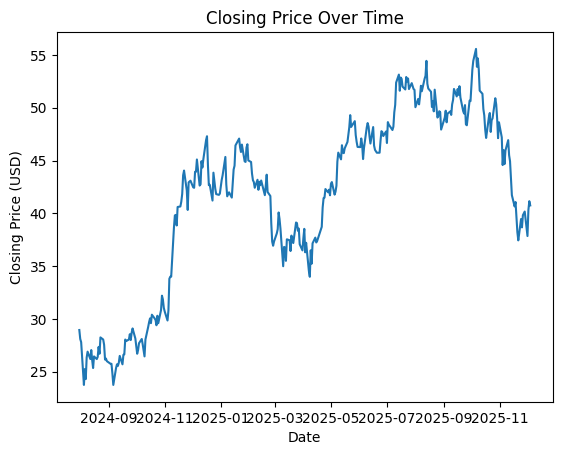

In [18]:
print(df['Close'].describe())

plt.plot(df['Close'])
plt.title('Closing Price Over Time')
plt.xlabel('Date')  
plt.ylabel('Closing Price (USD)')

count    3.390000e+02
mean     1.569068e+06
std      1.019762e+06
min      4.479000e+05
25%      9.463500e+05
50%      1.267920e+06
75%      1.928750e+06
max      8.564500e+06
Name: Volume, dtype: float64


Text(0, 0.5, 'Volume')

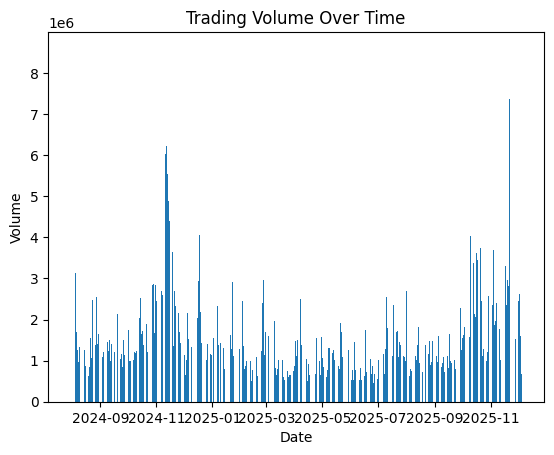

In [19]:
print(df['Volume'].describe())

plt.bar(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

count    339.000000
mean      -0.028038
std        0.808888
min       -3.210003
25%       -0.495001
50%       -0.010002
75%        0.450001
max        2.860001
dtype: float64


Text(0, 0.5, 'Price Change (USD)')

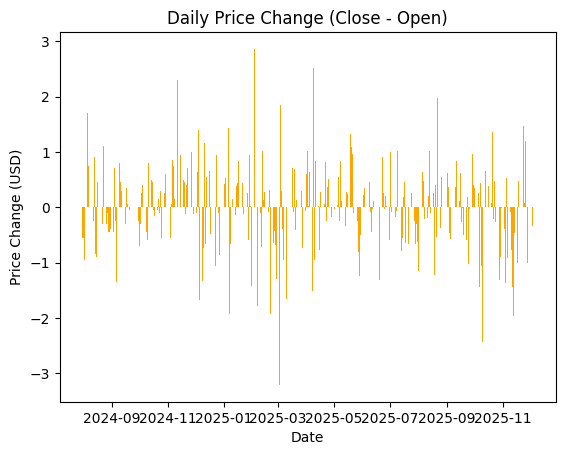

In [20]:
print((df['Close'] - df['Open']).describe())

plt.bar(df.index, df['Close'] - df['Open'], color='orange')
plt.title('Daily Price Change (Close - Open)')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')

In [31]:
print('Price up (1) or down (0) days:')
df['Price_Up'] = np.where(df['Close'] > df['Open'], 1, 0)
print(df['Price_Up'].value_counts())

Price up (1) or down (0) days:
Price_Up
0    175
1    164
Name: count, dtype: int64
